In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('30_train_features.csv')
for i in data.index:
    if data['OS'].iloc[i] <= 300:
        data['OS'].iloc[i] = 0
    elif data['OS'].iloc[i] <= 450 and data['OS'].iloc[i]>300:
        data['OS'].iloc[i] = 1
    else:
        data['OS'].iloc[i] = 2
#     else:
#         data['OS'].iloc[i] = 1

/home/kapil/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
X_train = data.drop(['OS'],axis=1)
y_train = data['OS']

In [5]:
test_data = pd.read_csv('30_test_features.csv')
for i in test_data.index:
    if test_data['OS'].iloc[i] <= 300:
        test_data['OS'].iloc[i] = 0
    elif test_data['OS'].iloc[i] <= 450 and test_data['OS'].iloc[i]>300:
        test_data['OS'].iloc[i] = 1
    else:
        test_data['OS'].iloc[i] = 2
#     else:
#         test_data['OS'].iloc[i] = 1

/home/kapil/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
X_test = test_data.drop(['OS'],axis=1)
y_test = test_data['OS']

In [7]:
print(X_test.shape,y_test.shape)

(33, 30) (33,)


In [8]:
num_labels = 3
one_hot_test = (np.arange(num_labels) == np.array(y_test)[:,None]).astype(np.float32)

In [9]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/ predictions.shape[0])

In [10]:
num_labels = 3
one_hot_y = (np.arange(num_labels) == np.array(y_train)[:,None]).astype(np.float32)

In [11]:
X_train = X_train.as_matrix()

In [12]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [19]:
# tf.set_random_seed(3)
beta = 0.01
feature_size = X_train.shape[1]

# tf_train = tf.placeholder(tf.float64,shape=(98,feature_size))
# tf_label = tf.placeholder(tf.float64,shape=(98,num_labels))
tf_train = tf.constant(X_train)
tf_label = tf.constant(one_hot_y)

tf_test = tf.constant(X_test)
tf_test_label = tf.constant(one_hot_test)

W = tf.Variable(tf.random_normal(shape=(feature_size,num_labels),dtype=tf.float64,seed=0))
b = tf.Variable(tf.zeros(shape=(num_labels),dtype=tf.float64))

z = tf.matmul(tf_train,W) + b
yhat = tf.sigmoid(z)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=yhat,labels=tf_label))
# regularizer = tf.nn.l2_loss(W)
# loss = tf.reduce_mean(loss + beta*regularizer)

optimizer = tf.train.AdagradOptimizer(0.1).minimize(loss)

test_pred = tf.nn.softmax(tf.matmul(tf_test,W) + b)
prediction = tf.nn.softmax(z)

In [20]:
epochs = 5000
costs = []
test_losses = []

with tf.Session() as sess:
#     tf.set_random_seed(3)
    sess.run(tf.global_variables_initializer())
    
    for i in range(epochs):
        sess.run(optimizer)
        
        cost = sess.run(loss)
        costs.append(cost)
        
        pred = sess.run(prediction) 
        
        if (i%1000 == 0):
            print('Accuracy = ',accuracy(pred,one_hot_y))
         #   print("Iteration:", '%04d' % (i + 1), "cost=", "{:.9f}".format(cost))
    test_prediction = sess.run(test_pred)
    print('Test Accuracy = ', accuracy(test_prediction,one_hot_test))
         

Accuracy =  30.612244898
Accuracy =  56.1224489796
Accuracy =  58.1632653061
Accuracy =  61.2244897959
Accuracy =  62.2448979592
Test Accuracy =  42.4242424242


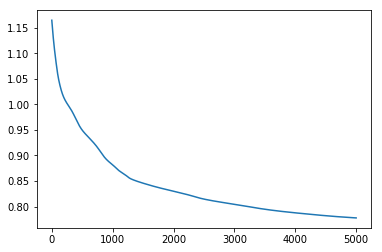

In [21]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show()

In [17]:
final_labels = np.argmax(test_prediction,1)

In [18]:
print(final_labels)
print(np.array((y_test)))

[0 2 1 0 2 0 2 0 0 0 0 0 0 2 0 1 2 1 2 2 2 1 2 0 2 1 1 0 2 2 2 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]


## For class 0

In [126]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(y_test)):
    if (y_test[i] == 0):
        if (final_labels[i] == 0):
            TP += 1
        else:
            FN += 1
    else:
        if (final_labels[i] == 0):
            FP += 1
        else:
            TN += 1
print(TP + TN + FP + FN)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
print('Sensitivity = ',sensitivity)
print('Specificity = ',specificity)

33
Sensitivity =  0.6428571428571429
Specificity =  0.7894736842105263


## For class 1

In [127]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(y_test)):
    if (y_test[i] == 1):
        if (final_labels[i] == 1):
            TP += 1
        else:
            FN += 1
    else:
        if (final_labels[i] == 1):
            FP += 1
        else:
            TN += 1
print(TP + TN + FP + FN)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
print('Sensitivity = ',sensitivity)
print('Specificity = ',specificity)

33
Sensitivity =  0.5
Specificity =  0.8260869565217391


## For class 2

In [128]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(y_test)):
    if (y_test[i] == 2):
        if (final_labels[i] == 2):
            TP += 1
        else:
            FN += 1
    else:
        if (final_labels[i] == 2):
            FP += 1
        else:
            TN += 1
print(TP + TN + FP + FN)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
print('Sensitivity = ',sensitivity)
print('Specificity = ',specificity)

33
Sensitivity =  0.5555555555555556
Specificity =  0.75


In [138]:
a = np.corrcoef(final_labels.astype(np.float32),y_test.astype(np.float32))
# val = tf.contrib.metrics.streaming_pearson_correlation(final_labels.astype(np.float32),y_test.astype(np.float32))

In [139]:
print(a)

[[ 1.          0.37737294]
 [ 0.37737294  1.        ]]
